# --------------------------------
# Instalação e importação de Dependências
# --------------------------------

In [11]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist

In [2]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation

encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
#normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
#train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50

235/235 [==============================] - 2s 4ms/step - loss: 0.2781 - val_loss: 0.1895
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1693 - val_loss: 0.1525
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1437 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1287 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1184 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1109 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1057 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1019 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0972 - val_loss: 0.095

- After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [10]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 775us/step


# ----------------------
# Usando Matplotlib
# ----------------------

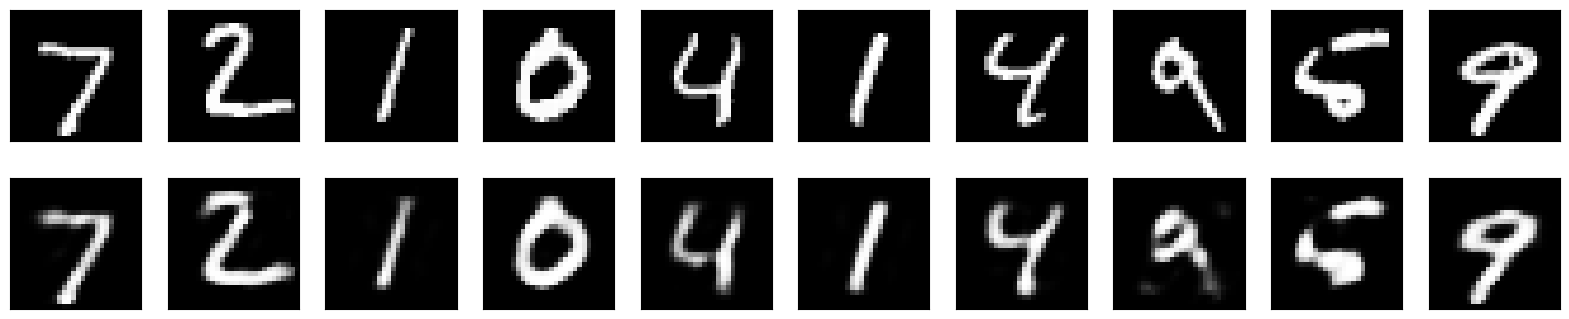

In [12]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# -------------------------------------------
# Adding a sparsity constraint on the encoded representations
# -------------------------------------------

Parei em (https://blog.keras.io/building-autoencoders-in-keras.html)